[![Open in Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/fat-forensics/events/master?filepath=resources%2F2022_simons-institute%2Fslides%2Fsimons.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fat-forensics/events/blob/master/resources/2022_simons-institute/slides/simons.ipynb)
[![new BSD](https://img.shields.io/github/license/fat-forensics/events.svg)](https://github.com/fat-forensics/events/blob/master/LICENCE)

# Where Does the Understanding Come From When Explaining Automated Decision-making Systems? #

> A myriad of approaches exists to help us peer inside automated decision-making systems
> based on artificial intelligence and machine learning algorithms.
> These tools and their insights, however, are socio-technological constructs themselves,
> hence subject to human biases and preferences as well as technical limitations.
> Under these conditions, how can we ensure that explanations are meaningful and fulfil
> their role by leading to understanding?
> In this talk I will demonstrate how different configurations of an explainability
> algorithm may impact the resulting insights and show the importance of the strategy
> employed to present them to the user, arguing in favour of a clear separation between
> the technical and social aspects of such tools.

Interactive slides for a [talk][talk] given at the [*AI and Humanity* cluster workshop][workshop]
held at the Simons Institute for the Theory of Computing, UC Berkeley.
The talk recording is available on [YouTube][youtube].

[talk]: https://simons.berkeley.edu/talks/tbd-453
[workshop]: https://simons.berkeley.edu/workshops/schedule/21107
[youtube]: https://youtu.be/9z-9yngCcTA

---

This slides are created with [RISE](https://rise.readthedocs.io/) and
offered as a Jupyter Notebook.
To launch the slideshow (based on the [reveal.js](https://revealjs.com/)
framework) install the dependencies (`pip install -r requirements.txt`) and
open the notebook within a Jupyter Notebook environment (not Jupyter Lab);
next:

1. execute all cells, and
2. launch RISE presentation by clicking the bar chart icon
   (<img src="../../../assets/images/barchart.svg" width=20px />) shown in the
   Jupyter Notebook toolbar.

More details are available on
<https://events.fat-forensics.org/2022_simons-institute/>.

<h1 style="text-align: center">Where Does the Understanding Come From</br>When Explaining Automated Decision-making Systems?</h1>
<br><br><br><br><br><br>
<p style="vertical-align:bottom; float:right; font-size: 120%;"><b>Kacper Sokol</b></p>

In [1]:
import os
REPOSITORY = (
    'https://raw.githubusercontent.com/fat-forensics/resources/master/{}')
SCRIPTS = [
    'surrogates_overview/scripts/__init__.py',
    'surrogates_overview/scripts/image_classifier.py',
    'surrogates_overview/scripts/imagenet_label_map.py',
    'surrogates_overview/scripts/surrogates_overview.py'
]

# ! pip install -r requirements.txt

img = 'doggo.jpg'
img_path = 'surrogates_overview/img/{}'.format(img)
img_url = REPOSITORY.format(img_path)
if not os.path.exists(img):
    ! wget $img_url -O $img

scr = 'scripts/'
! mkdir -p $scr
for script in SCRIPTS:
    url = REPOSITORY.format(script)
    scrpt = scr + os.path.basename(script)
    if not os.path.exists(scrpt):
        ! wget $url -O $scrpt

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [3]:
import IPython
from IPython.core.display import HTML
from IPython.display import set_matplotlib_formats

# Centre figures
HTML('''
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
''')

In [4]:
from PIL import Image

import numpy as np

import shap

import scripts.image_classifier as imgclf
import scripts.pi_ice_pd as pid
import scripts.surrogates_overview as exo

import sklearn.datasets
import sklearn.linear_model

22-Jul-18 14:19:11 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [5]:
# Load the image
doggo_img = Image.open('doggo.jpg')
doggo_array = np.array(doggo_img)

# Load the classifier
clf = imgclf.ImageClassifier()

# doggo_y = clf.predict(doggo)
doggo_proba = clf.predict_proba([doggo_array])
doggo_labels_3 = clf.proba2tuple(doggo_proba, labels_no=3)[0]

# Fix global options
SAMPLES = 10
BATCH = 100

The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.


<h2 style="text-align: center">Automated Decision-making</h2>

<img width="75%" align="middle" src="../../../assets/images/figures/val-automated-decisions.svg" alt="automated decision-making workflow" style="display: block; margin-left: auto; margin-right: auto;">

<h2 style="text-align: center">Explainability</h2>

### Human-Centred Explainability ###

<img width="75%" align="middle" src="../../../assets/images/figures/explanation.png" alt="insights from social sciences" style="display: block; margin-left: auto; margin-right: auto;">

- this has previously been neglected
- now we overcompensate
- explainers in themselves are socio-technical, and should be studied as such

<h2 style="text-align: center">Generating Explanations</h2>

### Model Prediction ###

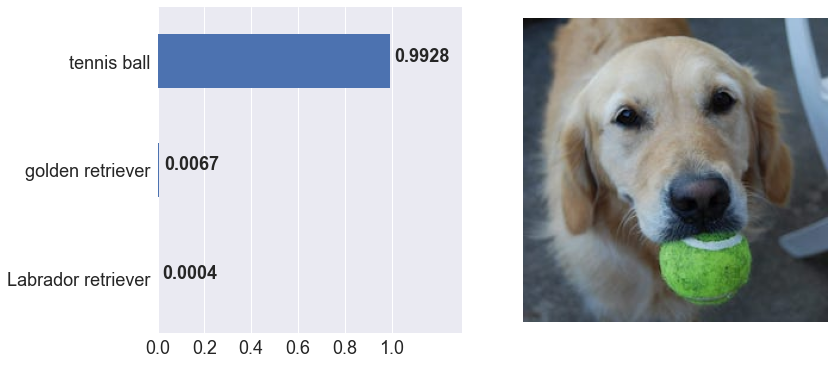

In [6]:
classification = exo.plot_image_prediction(doggo_labels_3, doggo_array)

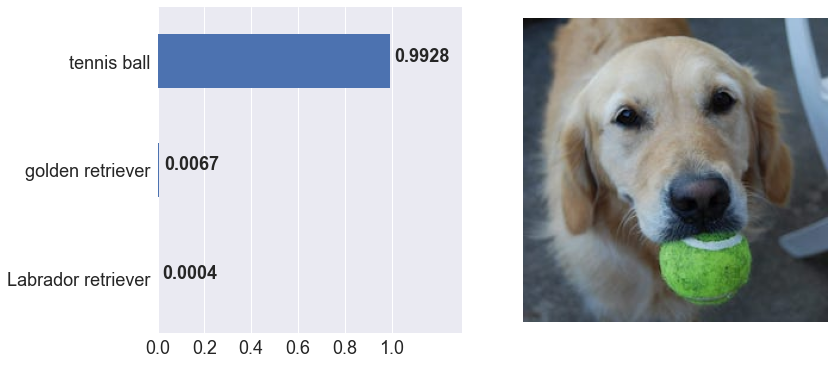

In [7]:
classification

### Prediction Explanation ###

In [8]:
# LIME explanation for tennis ball/golden retriever/Labrador retriever <->
# image colouring <-> bar plot
explain_classes = [(i[0], i[2]) for i in doggo_labels_3]
blimey_image = exo.build_image_blimey(
    doggo_array,
    clf.predict_proba,
    explain_classes,
    explanation_size=5,
    segments_number=13,
    occlusion_colour='mean',
    samples_number=SAMPLES,
    batch_size=BATCH,
    random_seed=42)

22-Jul-18 14:19:11 fatf         INFO     Seeding RNGs using the input parameter.
22-Jul-18 14:19:11 fatf         INFO     Seeding RNGs with 42.


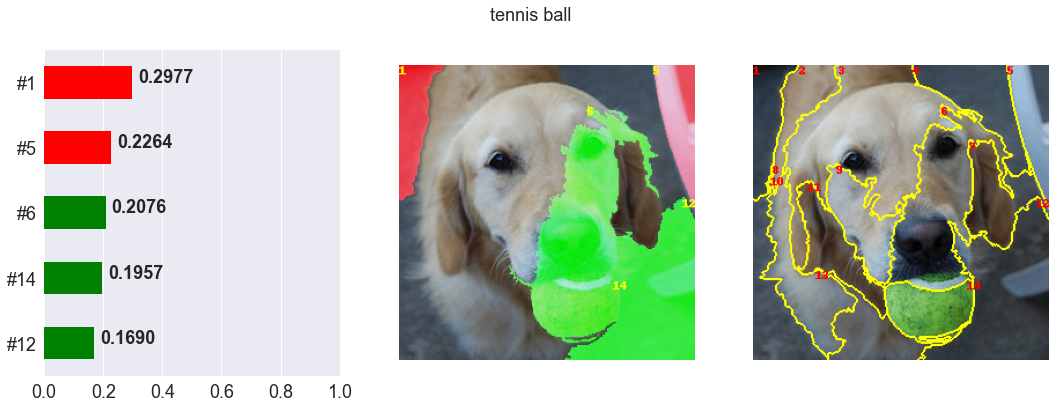

In [9]:
exo.plot_image_explanation(blimey_image, explain_classes[0])

### Prediction Explanation ###

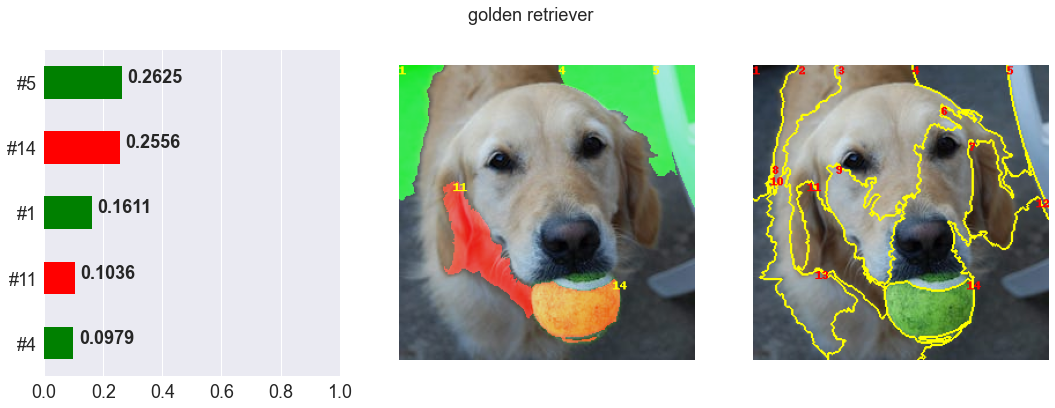

In [10]:
exo.plot_image_explanation(blimey_image, explain_classes[1])

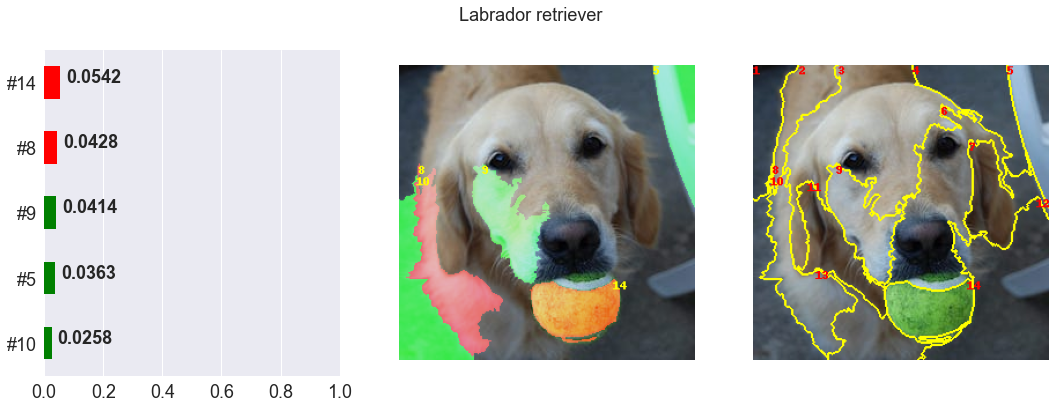

In [11]:
exo.plot_image_explanation(blimey_image, explain_classes[2])

### Explainer Demo ###

In [12]:
# Configure widgets to select occlusion colour, segmentation granularity and
# explained class
colour_selection = {
    i: i for i in ['mean', 'black', 'white', 'randomise-patch', 'green']
}
granularity_selection = {'low': 13, 'medium': 30, 'high': 50}
class_selection = {label: class_id for label, class_id in explain_classes}

In [13]:
# Generate explanations
blimey_image_collection = {}
for gran_name, gran_number in granularity_selection.items():
    blimey_image_collection[gran_name] = {}
    for col_name in colour_selection:
        blimey_image_collection[gran_name][col_name] = exo.build_image_blimey(
            doggo_array,
            clf.predict_proba,
            explain_classes,
            explanation_size=5,
            segments_number=gran_number,
            occlusion_colour=col_name,
            samples_number=SAMPLES,
            batch_size=BATCH,
            random_seed=42)

22-Jul-18 14:19:12 fatf         INFO     Seeding RNGs using the input parameter.
22-Jul-18 14:19:12 fatf         INFO     Seeding RNGs with 42.
22-Jul-18 14:19:13 fatf         INFO     Seeding RNGs using the input parameter.
22-Jul-18 14:19:13 fatf         INFO     Seeding RNGs with 42.
22-Jul-18 14:19:13 fatf         INFO     Seeding RNGs using the input parameter.
22-Jul-18 14:19:13 fatf         INFO     Seeding RNGs with 42.
22-Jul-18 14:19:13 fatf         INFO     Seeding RNGs using the input parameter.
22-Jul-18 14:19:13 fatf         INFO     Seeding RNGs with 42.
22-Jul-18 14:19:14 fatf         INFO     Seeding RNGs using the input parameter.
22-Jul-18 14:19:14 fatf         INFO     Seeding RNGs with 42.
22-Jul-18 14:19:14 fatf         INFO     Seeding RNGs using the input parameter.
22-Jul-18 14:19:14 fatf         INFO     Seeding RNGs with 42.
22-Jul-18 14:19:14 fatf         INFO     Seeding RNGs using the input parameter.
22-Jul-18 14:19:14 fatf         INFO     Seeding RNGs w

In [14]:
# Plot bar-plot explanation, image explanation and randomly occluded example
surrogate_image_explainer = exo.generate_image_widget(
    blimey_image_collection,
    granularity_selection,
    colour_selection,
    class_selection)

In [15]:
surrogate_image_explainer

<h2 style="text-align: center">Presenting Explanations</h2>

In [16]:
colour_positive = '#FF0D57'  # 255, 13, 87   # g
colour_negative = '#1E88E5'  # 30, 136, 229  # r

middle = .2
names = ['$f_{}$'.format(i) for i in range(9)]
values = [0, 0.1, 0, 0, 0.7, -0.1, 0, -0.3, 0]
colours = [colour_negative if i < 0 else colour_positive
           for i in values]
prediction = sum(values) + middle

$$
\Theta(\mathbf{f}) = 0.2 \;\; + \;\; 0.25 \times f_1 \;\; + \;\; 0.7 \times f_4 \;\; - \;\; 0.2 \times f_5 \;\; - \;\; 0.9 \times f_7
$$
</br>
$$
\mathbf{f} = (0.4, \ldots, 1, \frac{1}{2}, \ldots \frac{1}{3})
$$

---

$$
\Theta(\mathbf{f}) = 0.2 \;\; \underbrace{+0.1}_{f_1} \;\; \underbrace{+0.7}_{f_4} \;\; \underbrace{-0.1}_{f_5} \;\; \underbrace{-0.3}_{f_7} \;\; = \;\; 0.6
$$

FixedFormatter should only be used together with FixedLocator


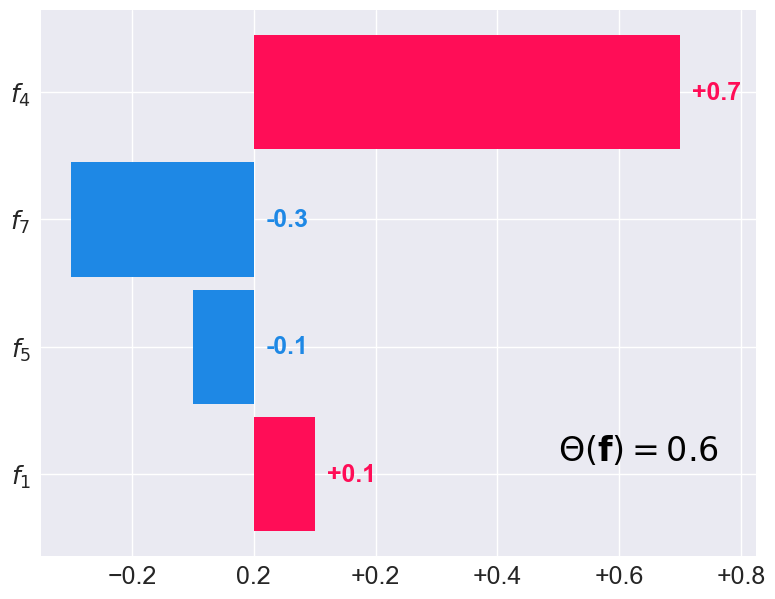

In [17]:
bar_explanation = plt.figure(figsize=(8, 6), dpi=100)
bar_explanation.patch.set_alpha(0)

# Filter
names_ = [names[i] for i, v in enumerate(values) if v]
values_ = [v for v in values if v]
colours_ = [colours[i] for i, v in enumerate(values) if v]

# Order
_ordering = np.argsort(np.abs(values_))

names_ = np.flip(np.asarray(names_)[_ordering]).tolist()
values_ = np.flip(np.asarray(values_)[_ordering]).tolist()
colours_ = np.flip(np.asarray(colours_)[_ordering]).tolist()

# Plot
plt.barh(names_[::-1],
         values_[::-1],
         color=colours_[::-1],
         height=.9)

for i, v in enumerate(values_[::-1]):
    v_s = f'+{v:.1f}' if v > 0 else f'{v:.1f}'.replace('−', '-')
    s = v + 0.02 if v > 0 else .02
    c = colour_negative if v < 0 else colour_positive
    plt.text(s, i - .06, v_s, color=c, fontweight='bold', fontsize=18)

plt.tight_layout()
left_, right_ = plt.xlim()
plt.xlim((left_, 1.10*right_))

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

ax = bar_explanation.axes[0]
x_ticks = [item.get_text() for item in ax.get_xticklabels()]
x_ticks_ = []
for i in x_ticks:
  if not i:
    x_ticks_.append(i)
    continue

  i_float = float(i.replace('−', '-'))
  if i_float < 0:
    x_ticks_.append(i)
  elif i_float == 0:
    x_ticks_.append(middle)
  else:
    x_ticks_.append(f'+{i}')
ax.set_xticklabels(x_ticks_)

plt.text(.5, 0.1, f'$\Theta(\mathbf{{f}})={prediction}$', color='k', fontsize=24)
plt.show()

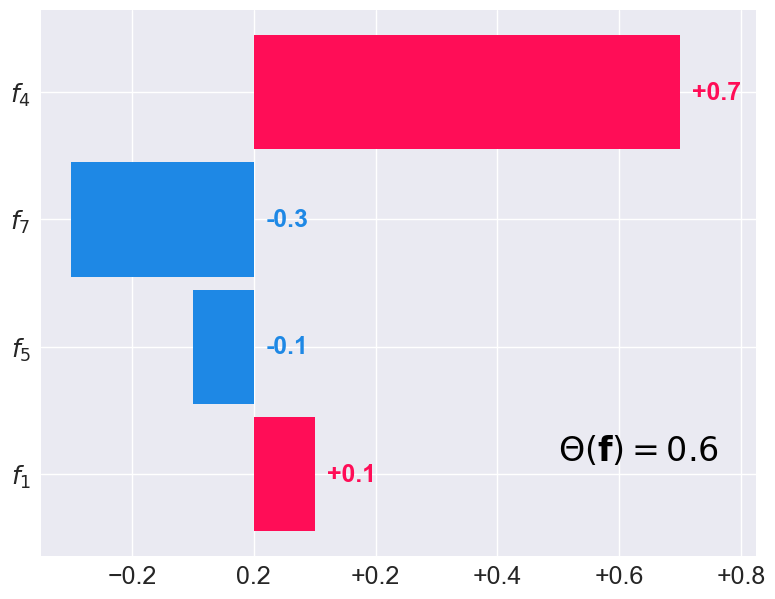

In [18]:
bar_explanation

<img width="60%" align="middle" src="../../../assets/images/figures/bar_exp.svg" alt="bar plot explanation" style="display: block; margin-left: auto; margin-right: auto;">

In [19]:
if False:
    force_plot = shap.plots.force(
        middle,
        shap_values=np.asarray(values),
        feature_names=names,
        contribution_threshold=.05)

    shap.initjs()

    # IPython.display.HTML(force_plot.html())
    force_plot

<img width="80%" align="middle" src="../../../assets/images/figures/force-plot.svg" alt="force plot explanation" style="display: block; margin-left: auto; margin-right: auto;">

<h2 style="text-align: center">Mapping Explainability</h2>

### Naïve View ###
</br></br>

<img width="75%" align="middle" src="../../../assets/images/figures/val-current.svg" alt="current validation" style="display: block; margin-left: auto; margin-right: auto;">

### Model and Explanation ###

<img width="50%" align="middle" src="../../../assets/images/figures/val-proposed1.svg" alt="proposed validation 1" style="display: block; margin-left: auto; margin-right: auto;">

### Phenomenon and Explanation ###

<img width="25%" align="middle" src="../../../assets/images/figures/val-proposed2.svg" alt="proposed validation 2" style="display: block; margin-left: auto; margin-right: auto;">

<h2 style="text-align: center">Conceptualising Explainability</h2>

**No universally accepted definition.**

* **Simulatability**

* **The Chinese Room Theorem**


* **Mental Models**
  - **Functional** – operationalisation without understanding
  - **Structural** – appreciation of the underlying mechanism

**The Blind Men and the Elephant.**

<img width="65%" align="middle" src="../../../assets/images/figures/elephant.svg" alt="The Blind Men and the Elephant" style="display: block; margin-left: auto; margin-right: auto;">

**Explainability is not a binary property; it is a continuous spectrum.**

<img width="75%" align="middle" src="../../../assets/images/figures/blackboxiness.svg" alt="shades of blackboxiness" style="display: block; margin-left: auto; margin-right: auto;">

> These are **diagnostic tools** that only become **explainers** when their
> </br>
> *caveats*, *properties* and *outputs* are well understood.

$$
\texttt{Explainability} \; =
$$
<br>
$$
\underbrace{ \texttt{Reasoning} \left( \texttt{Transparency} \; | \; \texttt{Background Knowledge} \right)}_{\textit{understanding}}
$$

* *Transparency* – **insight** (of arbitrary complexity) into operation of a system.
* *Background Knowledge* – implicit or explicit **exogenous information**.
* *Reasoning* – **algorithmic** or **mental processing** of information.

Explainability &rarr; **explainee** walking away with **understanding**.

<br><br><br><br><br><br>
<p style="text-align: right; vertical-align:bottom; float:right; font-size: 100%;"><a href="Kacper.Sokol@rmit.edu.au">Kacper.Sokol@rmit.edu.au</a></p>